# **BÁO CÁO CUỐI KỲ**
# **MÔN HỌC: LẬP TRÌNH SONG SONG ỨNG DỤNG**

# **Nhóm 11:**
1. 19120606 - NGUYỄN ĐÌNH HOÀNG NGUYÊN
2. 19120683 - THÁI TRUNG TÍN

# **ĐỀ TÀI: SONG SONG HÓA THUẬT TOÁN RANDOM FOREST**

# **1. Thư viện và phân công công việc**

## 1.1. Thư viện
Các thư viện để sử dụng trong đồ án:
  - math, numpy: xử lý các tính toán.
  - pandas: đọc dữ liệu.
  - numba: song song các tính toán
  - Một số thư viện khác: sklearn, time,...

## 1.2. Phân công công việc
Bảng phân công công việc: https://docs.google.com/spreadsheets/d/1oMdtCZXdq9Bq2ZzhLEOmxqwj-vTJG_heJ_0IB5iUb48/edit#gid=0

# **2. Decision Tree**

## 2.1. Giới thiệu
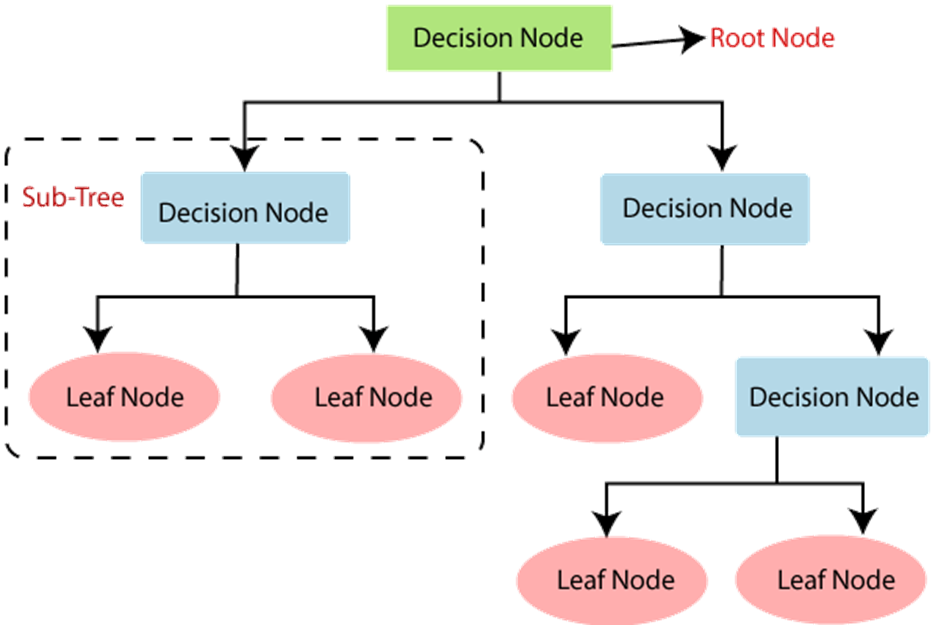

- Decision Tree là một thuật toán học máy có giám sát được dùng để giải quyết một cách dễ dàng và phù hợp cho các bài toán phân loại hay dự đoán trên các tập dữ liệu có cấu trúc.
- Thuật toán Decision Tree hoạt động bằng cách tạo ra một cây quyết định từ tập dữ liệu huấn luyện, trong đó mỗi nút trên cây đại diện cho một thuộc tính và mỗi cành trên cây đại diện cho một lựa chọn của thuộc tính đó. 
- Thuật toán sẽ phân tách dữ liệu dựa trên các thuộc tính có giá trị phân loại tốt nhất, sao cho các lá của cây biểu diễn các lớp dữ liệu phân loại.

## 2.2. Ưu điểm
- Dễ hiểu và dễ giải thích.
- Tính linh hoạt: áp dụng trên các bài toán phân loại hay dự đoán trên dạng dữ liệu số và dữ liệu phân loại.
- Không cần quá nhiều dữ liệu để huấn luyện.
- Lựa chọn thuộc tính quan trọng.

## 2.3. Nhược điểm
- Dễ bị quá khớp (overfitting).
- Không đảm bảo xây dựng được cây tối ưu.
- Tính toán phức tạp.


# **3. Random Forest**

## 3.1. Giới thiệu
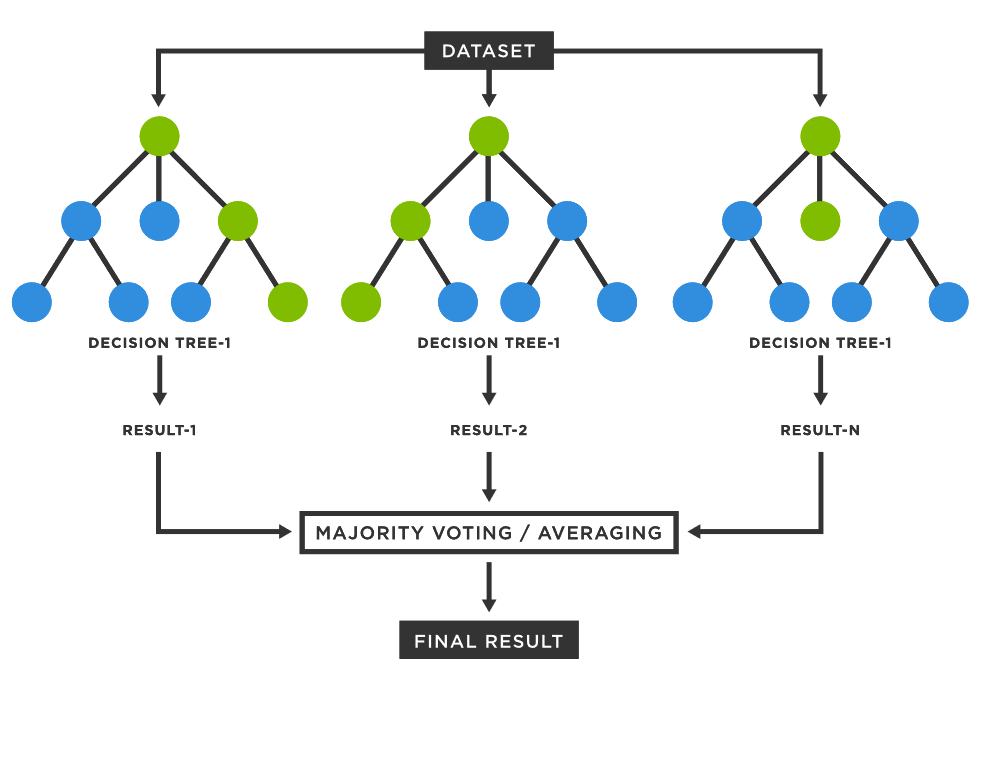

- Random Forest là một thuật toán học máy có giám sát được dung để giải quyết bài toán phân loại hay dự đoán.
- Random Forest hoạt động bằng cách xây dựng nhiều cây quyết định (Decision Tree) trên các tập dữ liệu khác nhau và trên một số thuộc tính ngẫu nhiên được chọn từ tập thuộc tính ban đầu.
- Khi có một mẫu dữ liệu mới được đưa vào, Random Forest sẽ tính toán dự đoán bằng cách sử dụng các cây quyết định đã được xây dựng để đưa ra kết quả.

## 3.2. Ưu điểm
- Giảm thiểu quá khớp (overfitting).
- Tính linh hoạt: áp dụng trên các bài toán phân loại hay dự đoán trên dạng dữ liệu số và dữ liệu phân loại.
- Khả năng mở rộng và tùy chỉnh.
- Dễ dàng khi lựa chọn thuộc tính quan trọng.

## 3.3. Nhược điểm
- Khó để hiểu và giải thích kết quả.
- Tính toán phức tạp.
- **Tốc độ huấn luyện chậm**.
- **Yêu cầu nhiều tài nguyên hơn**.



# **4. Song song hóa**

## 4.1. Đặt vấn đề
- Random Forest có tốc độ huấn luyện chậm và têu cầu nhiều tài nguyên hơn. Vấn đề mà ta cần giải quyết đó là tăng tốc tốc độ huấn luyện.
- Cách để tăng tốc tốc độ huấn luyện: Ta sẽ song song hóa một số bước tính toán trong cả 2 thuật toán tuần tự Decision Tree và Random Forest.

## 4.2. Xây dựng thuật toán

### 4.2.1. Thuật toán Decision Tree: Phân lớp bằng thuật toán ID3
- Bước 1: Tính toán giá trị thông tin (Information Gain - IG) cho từng thuộc tính trong tập dữ liệu. 
- Bước 2: Chọn thuộc tính có IG cao nhất làm thuộc tính phân chia cho nút cây và tạo một nút cây mới với thuộc tính phân chia được chọn.
- Bước 3: Tách tệp dữ liệu thành các tệp dựa trên giá trị của thuộc tính phân chia được chọn ở Bước 2. 
- Bước 4: Nếu một tệp con là tệp dữ liệu trống hoặc chỉ chứa các điểm dữ liệu có cùng nhãn, thì hãy tạo một nút lá và gán nhãn cho nút lá này là nhãn của tệp con. 
- Bước 5: Nếu tất cả các thuộc tính đều được sử dụng để xây dựng cây hoặc tệp con không còn đủ điều kiện để tiếp tục phân chia, tạo một nút lá và gán nhãn cho nút lá này là nhãn xuất hiện nhiều nhất trong dữ liệu.
- Bước 6: Đối chiếu với từng tập con, lặp lại các bước từ Bước 1 đến Bước 6 để khi tạo ra một cây hoàn chỉnh.

### 4.2.2. Thuật toán: Phân lớp bằng thuật toán Random Forest
- Bước 1: Chọn số lượng cây quyết định cần xây dựng. 
- Bước 2: Huấn luyện các cây quyết định: Với mỗi cây quyết định:
	+ Chọn một tập dữ liệu con có kích thước bằng với kích thước của tập dữ liệu huấn luyện, được tạo ra bằng cách lấy ngẫu nhiên mẫu từ tập dữ liệu huấn luyện (bootstrapping).
	+ Xây dựng cây quyết định bằng thuật toán ID3 trên tập dữ liệu con được chọn.
- Bước 3: Dự đoán. 
	+ Áp dụng các cây quyết định đã huấn luyện để dự đoán kết quả.
	+ Lấy kết quả dự đoán của tất cả các cây quyết định và thực hiện đa số phiếu (voting) để đưa ra kết quả dự đoán cuối cùng.

## 4.3. Song song hóa

### 4.3.1. Decision Tree
- Bước 1: Tính toán giá trị thông tin (Information Gain - IG) cho từng thuộc tính trong tập dữ liệu:
	+ Bước tính entropy.
	+ Bước tách thuộc tính trong trong cột dữ liệu.
- Bước 2: Chọn thuộc tính có IG cao nhất làm thuộc tính phân chia cho nút cây và tạo một nút cây mới với thuộc tính phân chia được chọn.

### 4.3.2. Random Forest
- Bước 2: Huấn luyện các cây quyết định: Với mỗi cây quyết định:
	+ Chọn một tập dữ liệu con có kích thước bằng với kích thước của tập dữ liệu huấn luyện, được tạo ra bằng cách lấy ngẫu nhiên mẫu từ tập dữ liệu huấn luyện (bootstrapping).
	+ Xây dựng cây quyết định bằng thuật toán ID3 trên tập dữ liệu con được chọn.





# **5. Cài đặt**

## Import thư viện

In [ ]:
import numpy as np
import pandas as pd
import math
import time

import warnings 
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import RandomForest_Sequential as rf_s
import RandomForest_Parallel_v1 as rf_p1
import RandomForest_Parallel_v2 as rf_p2
import RandomForest_Parallel_v3 as rf_p3

## Đọc dữ liệu

In [ ]:
!wget https://raw.githubusercontent.com/HoangNguyen31/LTSSUD/main/data/train.csv

--2023-06-05 17:25:35--  https://raw.githubusercontent.com/HoangNguyen31/LTSSUD/main/data/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22025004 (21M) [text/plain]
Saving to: ‘train.csv.1’

train.csv.1         100%[===================>]  21.00M  --.-KB/s    in 0.1s    

2023-06-05 17:25:35 (155 MB/s) - ‘train.csv.1’ saved [22025004/22025004]



In [ ]:
df = pd.read_csv("train.csv")

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
print("X shape:", X.shape)
print("y shape:", y.shape)
print("X train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X shape: (80000, 64)
y shape: (80000,)
X train shape: (64000, 64)
y_train shape: (64000,)


## Thí nghiệm

### Hàm tính toán **`entropy`**

In [ ]:
start = time.time()

en_s = rf_s.entropy(y)

end = time.time()
print(f'Processing time: {end - start} s')

Processing time: 0.028704404830932617 s


In [ ]:
start = time.time()

en_s = rf_p1.entropy(y)

end = time.time()
print(f'Processing time: {end - start} s')

Processing time: 0.007920980453491211 s


In [ ]:
start = time.time()

en_s = rf_p2.entropy(y)

end = time.time()
print(f'Processing time: {end - start} s')

Processing time: 0.005532026290893555 s


In [ ]:
start = time.time()

en_s = rf_p3.entropy(y)

end = time.time()
print(f'Processing time: {end - start} s')

Processing time: 0.0034885406494140625 s


### Hàm chia dữ liệu **`split`**

In [ ]:
start = time.time()

en_s = rf_s.split(y, 5)

end = time.time()
print(f'Processing time: {end - start} s')

Processing time: 0.028095245361328125 s


In [ ]:
start = time.time()

en_s = rf_p1.split(y, 5)

end = time.time()
print(f'Processing time: {end - start} s')

Processing time: 0.017890214920043945 s


In [ ]:
start = time.time()

en_s = rf_p2.split(y, 5)

end = time.time()
print(f'Processing time: {end - start} s')

Processing time: 0.01023411750793457 s


In [ ]:
start = time.time()

en_s = rf_p3.split(y, 5)

end = time.time()
print(f'Processing time: {end - start} s')

Processing time: 0.004290103912353516 s


## Thực thi thuật toán

### Chạy tuần tự

In [ ]:
start = time.time()

clf = rf_s.RandomForest(n_trees=10, max_depth=15)
clf.fit(X_train, y_train)

end = time.time()
print(f'Processing time: {end - start} s')

y_pred = clf.predict(X_test)
print("Accuracy score:", accuracy_score(y_test, y_pred))

Processing time: 2383.5319124 s
Accuracy score: 0.9895625


### Chạy song song phiên bản 1: 
- Ta song song hóa 2 bước và dùng Numba để biên dịch hàm Python ra mã máy và chạy song song trên CPU/host:
  + Bước tính entropy.
  + Bước tách thuộc tính trong trong cột dữ liệu.


In [ ]:
start = time.time()

clf = rf_p1.RandomForest(n_trees=10, max_depth=15)
clf.fit(X_train, y_train)

end = time.time()
print(f'Processing time: {end - start} s')

y_pred = clf.predict(X_test)
print("Accuracy score:", accuracy_score(y_test, y_pred))

Processing time: 2057.1512477 s
Accuracy score: 0.9925625


### Chạy song song phiên bản 2: 
- Ta song song hóa 2 bước và dùng Numba để biên dịch hàm Python ra mã máy và chạy song song trên GPU/device:
  + Bước tính entropy.
  + Bước tách thuộc tính trong trong cột dữ liệu.

In [ ]:
start = time.time()

clf = rf_p2.RandomForest(n_trees=10, max_depth=15)
clf.fit(X_train, y_train)

end = time.time()
print(f'Processing time: {end - start} s')

y_pred = clf.predict(X_test)
print("Accuracy score:", accuracy_score(y_test, y_pred))

Processing time: 1626.7526212 s
Accuracy score: 0.9925625


### Chạy song song phiên bản 3:
- Ta song song hóa 2 bước dùng Numba để biên dịch hàm Python ra mã máy và chạy song song trên GPU/device có sử dụng shared memory
	+ Bước tính entropy.
	+ Bước tách thuộc tính trong trong cột dữ liệu.
- Kết hợp với việc song song hóa bước Huấn luyện các cây quyết định:


In [ ]:
start = time.time()

clf = rf_p3.RandomForest(n_trees=10, max_depth=15)
clf.fit(X_train, y_train)

end = time.time()
print(f'Processing time: {end - start} s')

y_pred = clf.predict(X_test)
print("Accuracy score:", accuracy_score(y_test, y_pred))

Processing time: 1175.8521991 s
Accuracy score: 0.9925625


# **6.Nhận xét**

| <font size="4"> Phiên bản </font>|<font size="4"> Thời gian </font> |<font size="4"> So sánh với tuần tự |<font size="4"> Độ chính xác |
|:-------------------:|-----------------------:|-----------------------:|-----------------------:|
| <font size="4"> Sequential (Tuần tự)</font> | <font size="4"> ~40p </font> | <font size="4"> 100.0% | <font size="4"> ~0.98 |
| <font size="4"> Parallel 1 (Song song 1)</font> | <font size="4"> ~34p </font> | <font size="4"> 117.6% | <font size="4"> ~0.99 |
| <font size="4"> Parallel 2 (Song song 2)</font> | <font size="4"> ~27p </font> | <font size="4"> 148.1% | <font size="4"> ~0.99 |
| <font size="4"> Parallel 3 (Song song 3)</font> | <font size="4"> ~19p </font> | <font size="4"> 210.5% | <font size="4"> ~0.99 |

- Khi sử dụng phiên bản tuần tự ta có tốc độ huấn luyện là khoảng 40 phút (khá lâu).
- Các phiên bản song song đều có tốc độ cải thiện so với phiên bản tuần tự và phiên bản song song sau đều có tốc độ nhanh hơn so với phiên bản song song trước.
- Độ chính xác của các phiên bản đều rất tốt (~0.98).

# **7. Nhìn lại quá trình làm đồ án**

- ƯU điểm:
  - Học được cách lập trình một thuật toán học máy một cách tuần tự.
  - Song song hóa thành công thuật toán học máy tuần tự, cải thiện tốc độ huấn luyện.
  - Các phiên bản song song đều có tốc độ huấn luyện nhanh hơn so với phiên bản trước.
  - Độ chính xác của các phiên bản đều rất tốt (~0.98).
- Nhược điểm:
  - Phiên bản tuần tự chưa có bất kỳ tối ưu nào nên tốc độ còn chậm.
  - Phiên bản song song chỉ song song các bước tính toán đơn giản.